# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID: Group 90
- Names: Hoang Manh Nguyen, Trung Hieu Nguyen, Thao Nguyen
- Student IDs:  219380205, 219560953 , 218197069
- Emails:  manhnguyen@deakin.edu.au, ngtru@deakin.edu.au, tunguye@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile

# Your file might be in a different location, so you need to customize the path
all_files = ZipFile('/content/drive/MyDrive/HTWebLog_p1.zip', 'r')
files = all_files.namelist()

data = []

# Define the column names
ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']

#Your code to load data from all log files in the provided zip file

ProgressBar = IntProgress(value=0,min=0,max=len(files),step=1,
                          description='Loading:',bar_style='',orientation='horizontal')
display(ProgressBar)

# Read files
for name in all_files.namelist():
    ProgressBar.value += 1
    Rawdata = pd.read_csv(all_files.open(name),delim_whitespace=True,na_values='-',skiprows = 4,                      
                            usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],header=None,encoding='iso-8859-1',names=ColumnNames,                          
                            error_bad_lines=False,warn_bad_lines=False,
                            dtype={'date': str,'time': str,'s-sitename': str, 's-ip': str,'cs-method': str,'cs-uri-stem': str,
                                   'cs-uri-query': str,'s-port': str,'cs-username': str,'c-ip': str,'cs(User-Agent)': str,
                                   'cs(Referer)': str, 'sc-status': str,'sc-substatus': str,'sc-win32-status': str}
                           )
    
    # drop rows starts with "#"
    Rawdata = Rawdata[~Rawdata['date'].str.startswith("#")]
    
    data.append(Rawdata)

# Concatenate all the pandas dataframes into a single dataframe
Tulip = pd.concat(data)

print ('Loaded', ProgressBar.value, 'weblog files.')



IntProgress(value=0, description='Loading:', max=120)

Loaded 120 weblog files.


In [14]:
# print info 
Tulip.reset_index(drop=True, inplace=True)
print("Shape of the dataframe df_ht is {}.\n".format(Tulip.shape))
print("** And dataframe info per below **\n")
print(Tulip.info(null_counts=True))

Shape of the dataframe df_ht is (8438928, 15).

** And dataframe info per below **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438928 entries, 0 to 8438927
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             8438928 non-null  object
 1   time             8438928 non-null  object
 2   s-sitename       8438928 non-null  object
 3   s-ip             8438928 non-null  object
 4   cs-method        8438928 non-null  object
 5   cs-uri-stem      8438928 non-null  object
 6   cs-uri-query     552396 non-null   object
 7   s-port           8438928 non-null  object
 8   cs-username      0 non-null        object
 9   c-ip             8438928 non-null  object
 10  cs(User-Agent)   8435401 non-null  object
 11  cs(Referer)      7129934 non-null  object
 12  sc-status        8438928 non-null  object
 13  sc-substatus     8438928 non-null  object
 14  sc-win32-status  8438928 non-null  object
dtyp

In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [15]:
#Your code to remove missing values as required.
# check NAs in each column
NA_count = Tulip.isna().sum() 

# Percentage of NAs in each column
NA_percent = round((NA_count / len(Tulip) * 100),2)
print(NA_percent)
print('\nThe columns which have more than 15% NAs are: cs-uri-query, cs-username, cs(Referer)')

date                 0.00
time                 0.00
s-sitename           0.00
s-ip                 0.00
cs-method            0.00
cs-uri-stem          0.00
cs-uri-query        93.45
s-port               0.00
cs-username        100.00
c-ip                 0.00
cs(User-Agent)       0.04
cs(Referer)         15.51
sc-status            0.00
sc-substatus         0.00
sc-win32-status      0.00
dtype: float64

The columns which have more than 15% NAs are: cs-uri-query, cs-username, cs(Referer)


In [16]:
# Removing columns have more than 15% NAs
Tulip.drop(columns=['cs-uri-query','cs-username','cs(Referer)'], inplace=True)

# Remove rows with any NAs
Tulip.dropna(axis=0, how='any', inplace=True)

# check info after removing NAs
Tulip.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8435401 entries, 0 to 8438927
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             8435401 non-null  object
 1   time             8435401 non-null  object
 2   s-sitename       8435401 non-null  object
 3   s-ip             8435401 non-null  object
 4   cs-method        8435401 non-null  object
 5   cs-uri-stem      8435401 non-null  object
 6   s-port           8435401 non-null  object
 7   c-ip             8435401 non-null  object
 8   cs(User-Agent)   8435401 non-null  object
 9   sc-status        8435401 non-null  object
 10  sc-substatus     8435401 non-null  object
 11  sc-win32-status  8435401 non-null  object
dtypes: object(12)
memory usage: 836.6+ MB


In [17]:
# only 30% of total data are selected for classification
weblog_df = Tulip.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df

print('the number of requests in weblog_df is',len(weblog_df))

the number of requests in weblog_df is 2530620


In [18]:
weblog_df.head(3)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
2485078,2006-12-03,09:39:19,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,80,218.102.231.100,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2614281,2006-12-04,15:30:01,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,80,218.190.226.30,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
8134100,2007-02-23,06:50:42,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_about...,80,203.241.147.26,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0,64


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [19]:
# Your code for feature selection
ml_df = weblog_df.loc[:,['cs-method','c-ip','cs-uri-stem','cs(User-Agent)','sc-status']] 

# Data Description of ml_df
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530620 entries, 2485078 to 5375190
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   cs-method       object
 1   c-ip            object
 2   cs-uri-stem     object
 3   cs(User-Agent)  object
 4   sc-status       object
dtypes: object(5)
memory usage: 115.8+ MB


In [20]:
ml_df.describe()

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
count,2530620,2530620,2530620,2530620,2530620
unique,6,69837,3616,4653,12
top,GET,59.188.33.66,/Tulip/common/common_style.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
freq,2525568,27935,121304,594218,1821993


In [21]:
#Your code to show the top 5 rows of ml_df
ml_df.head(5)

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
2485078,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2614281,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
8134100,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
1152052,GET,203.85.132.97,/Tulip/public/2899_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
8167676,GET,218.186.9.5,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



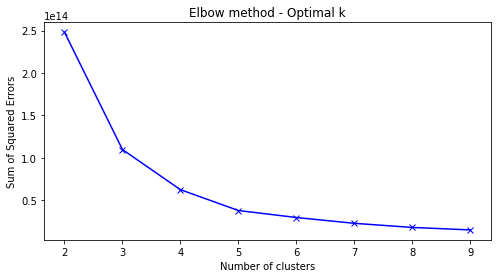

The best cluster k for Kmeans is 4


In [13]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

#Your code for Kmeans
# Apply Kmeans model for 4 features: 'cs-method','c-ip','cs-uri-stem','cs(User-Agent)', exclude 'sc-status' as label
Dt_for_Kmeans = le_df.drop(columns=['sc-status'])

SSE = []
K = range(2,10)
for k in K:
    Cluster = KMeans(n_clusters = k, random_state = 0, init='k-means++',n_init=10, max_iter=300).fit(Dt_for_Kmeans)
    SSE.append(Cluster.inertia_)

#Your code for visualizing K means result as elbow plot.
plt.figure(figsize=(8,4))
plt.plot(K, SSE, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow method - Optimal k')
plt.show()

print ('The best cluster k for Kmeans is 4')

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [14]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [15]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [17]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)
sl_df.count()

2530620

In [18]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)
sl_df.count()

253029

In [19]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)
df_temp.count()

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    18825|2741|       1385|             0|[18825.0,2741.0,1...|
|        0|    68103|2425|       1459|             0|[68103.0,2425.0,1...|
|        0|    41459|2087|       4238|             0|[41459.0,2087.0,4...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



253029

In [20]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
print("Rows of df_sl is: " + str(df_sl.count()))
df_sl.show(3)

Rows of df_sl is: 253029
+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[18825.0,2741.0,1...|
|        0|[68103.0,2425.0,1...|
|        0|[41459.0,2087.0,4...|
+---------+--------------------+
only showing top 3 rows



In [21]:
df_sl.printSchema()

root
 |-- sc_status: integer (nullable = true)
 |-- features: vector (nullable = true)



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [22]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 177019
Test Dataset Count: 76010


In [23]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import numpy as np
# Your code contains trainning from train data and predicting based on the test data
## Create Logistic Regression model
LR = LogisticRegression(featuresCol='features', labelCol='sc_status',family='multinomial')

## train model using training data
LRtest=LR.fit(trainingData)

## make predictions on test data 
LRpred=LRtest.transform(testData)

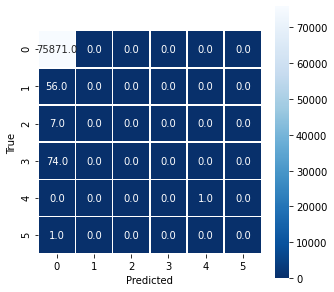

In [24]:
# Your code to display TP, TN, FP, FN

# Create confusion matrix
pred_and_label = LRpred.select(['prediction','sc_status'])

metrics = MulticlassMetrics(pred_and_label.rdd.map(lambda x: tuple(map(float, x))))
cf = metrics.confusionMatrix().toArray()

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True');
plt.xlabel('Predicted');

In [25]:
# Calculate TP, FP, FN, TN for each class in label
TP = np.diag(cf)
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
TP = TP.astype(int)
FP = FP.astype(int)
FN = FN.astype(int)
TN = TN.astype(int)
print('TP of each class in label is:')
print(TP,'\n')
print('FP of each class in label is:')
print(FP, '\n')
print('FN of each class in label is:')
print(FN, '\n')
print('TN of each class in label is:')
print(TN)

TP of each class in label is:
[75871     0     0     0     1     0] 

FP of each class in label is:
[138   0   0   0   0   0] 

FN of each class in label is:
[ 0 56  7 74  0  1] 

TN of each class in label is:
[    1 75954 76003 75936 76009 76009]


In [26]:
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.
# Create classification report
y_true = pred_and_label.select(['sc_status']).collect()
y_pred = pred_and_label.select(['prediction']).collect()
print(classification_report(y_true, y_pred, digits= 6))

              precision    recall  f1-score   support

           0   0.998184  1.000000  0.999091     75871
           1   0.000000  0.000000  0.000000        56
           2   0.000000  0.000000  0.000000         7
           3   0.000000  0.000000  0.000000        74
           4   1.000000  1.000000  1.000000         1
           5   0.000000  0.000000  0.000000         1

    accuracy                       0.998184     76010
   macro avg   0.333031  0.333333  0.333182     76010
weighted avg   0.996372  0.998184  0.997277     76010



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Weighted precision, Weighted recall, Weighted f1
wprec = metrics.weightedPrecision
wrec = metrics.weightedRecall
wf1 = metrics.weightedFMeasure()
print('the weighted precision is:', wprec,'\n')
print('the weighted recall is:', wrec,'\n')
print('the weighted f1-score is:', wf1)

the weighted precision is: 0.996372195096396 

the weighted recall is: 0.9981844494145508 

the weighted f1-score is: 0.9972774989374068


In [28]:
# Precision, Recall and F1-score of each class in label
# Precision
Precision = TP/(TP+FP)
print('the precision of each class in lable is:', Precision,'\n')
# Recall
Recall = TP/(TP+FN)
print('the recall of each class in lable is:', Recall,'\n')
# F1-score
F1 = 2*(Precision*Recall)/(Precision+Recall)
print('the f1 score of each class in lable is:', F1)

the precision of each class in lable is: [0.99818443        nan        nan        nan 1.                nan] 

the recall of each class in lable is: [1. 0. 0. 0. 1. 0.] 

the f1 score of each class in lable is: [0.99909139        nan        nan        nan 1.                nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [29]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Your code for 2-fold cross validation
# Create models: DT, LR, RF
dt = DecisionTreeClassifier(featuresCol='features', labelCol='sc_status')
lr = LogisticRegression(featuresCol='features', labelCol='sc_status', family='multinomial')
rf = RandomForestClassifier(featuresCol='features', labelCol='sc_status')

#Create Pipeline
pl = Pipeline(stages=[])

#Create Hyperpara grid
dt_param = (ParamGridBuilder() #For Decision tree
    .baseOn({pl.stages: [dt]}) 
    .addGrid(dt.maxDepth, [2, 5, 10])
    .addGrid(dt.maxBins, [10, 20, 30]) 
    # .addGrid(dt.impurity, ['entropy', 'gini']) 
    .build())

lr_param = (ParamGridBuilder() #For Logistic Regression
    .baseOn({pl.stages: [lr]}) 
    .addGrid(lr.regParam, [0.1, 0.3, 0.5]) 
    .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) 
    .addGrid(lr.maxIter, [5, 10, 20])      
    .build())
    
rf_param = (ParamGridBuilder() #For Random Forest
    .baseOn({pl.stages: [rf]})
    # .addGrid(rf.maxDepth, [2, 5, 10])
    # .addGrid(rf.maxBins, [10, 20, 30])
    # .addGrid(rf.impurity, ['entropy', 'gini'])
    .addGrid(rf.numTrees, [10, 20, 30])
    .addGrid(rf.featureSubsetStrategy, ['onethird', 'sqrt', 'log2'])
    .build())    

all_grids = dt_param + lr_param + rf_param

In [30]:
# Create evaluator
# Metric is F1-score becasause data distribution is imbalanced, F1 is better than Accuracy
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='sc_status', metricName='f1')

# Create 2-fold CrossValidator
cv = CrossValidator(estimator = pl,
                    estimatorParamMaps = all_grids,
                    evaluator = evaluator,
                    numFolds = 2)

# Apply to training data
import time
start_time = time.time()
CV_model = cv.fit(trainingData)
end_time = time.time()

print("--- CV execution: %s seconds ---" % (end_time - start_time))

--- CV execution: 497.6759614944458 seconds ---


In [31]:
CV_model.avgMetrics

[0.9968459863247853,
 0.9968459863247853,
 0.9968624443384156,
 0.9980271048236358,
 0.9976069209716869,
 0.9974728921229217,
 0.9982974121396562,
 0.9984955171079404,
 0.9988531724427007,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9968319670767285,
 0.9969738624476814,
 0.9969738624476814,
 0.9969738624476814,
 0.9977586168536037,
 0.9977586168536037,
 0.9977586168536037,
 0.9977631661637981,
 0.9977631661637981,
 0.9977631661637981]

In [32]:
# Best Model parameters with highest f1-score (the higher f1 better)
CV_model.getEstimatorParamMaps()[np.argmax(CV_model.avgMetrics)]

{Param(parent='DecisionTreeClassifier_857e64037f59', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 30,
 Param(parent='DecisionTreeClassifier_857e64037f59', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 10,
 Param(parent='Pipeline_6ac3359fbbf7', name='stages', doc='a list of pipeline stages'): [DecisionTreeClassifier_857e64037f59]}

In [33]:
# F1 of best model
f1_best = np.max(CV_model.avgMetrics)
print ('F1 of the best model is:', f1_best)

F1 of the best model is: 0.9988531724427007


In [34]:
# Transform test data to calculate F1 of predictions
print('F1-score of prediction result is:')
evaluator.evaluate(CV_model.transform(testData))

F1-score of prediction result is:


0.9988989606364638

In [35]:
# Prediction result
CV_model.transform(testData).limit(10).select("sc_status","prediction").show()

+---------+----------+
|sc_status|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+



## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [22]:
!pip install apyori

In [24]:
# you can also use PySpark package, if preferred

from apyori import apriori
import numpy as np

# Your code

# Use data: ml_df from task 1.2.Feature selection, in which:
# 'cs-method', 'cs-uri-stem' are Item lists
# 'c-ip', 'cs(User-Agent)' are used to identify unique user ID 
ml_df.info()
ml_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530620 entries, 2485078 to 5375190
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   cs-method       object
 1   c-ip            object
 2   cs-uri-stem     object
 3   cs(User-Agent)  object
 4   sc-status       object
dtypes: object(5)
memory usage: 115.8+ MB


,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
2485078,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2614281,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
8134100,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304


In [74]:
################ DATA PREPROCESSING ################
# Remove error entries, which have status code less than 200 and greater than 400
ml_df["sc-status"] = pd.to_numeric(ml_df["sc-status"])
armRaw = ml_df.loc[(ml_df["sc-status"] >= 200) & (ml_df["sc-status"] < 400)]

### Create dt_for_arm
dt_for_arm = armRaw.loc[:,['cs-method','cs-uri-stem']]
# Create Web Usage Description by combining cs-method and cs-uri-stem  
dt_for_arm['Web Usage Description'] = dt_for_arm['cs-method'] + dt_for_arm['cs-uri-stem']

 # Create uniqueID by combining c-ip and cs(User-Agent)
dt_for_arm['uniqueID'] = armRaw['c-ip'] + armRaw['cs(User-Agent)']
dt_for_arm = dt_for_arm.drop(columns=['cs-method','cs-uri-stem'])

from sklearn.preprocessing import LabelEncoder
# creating labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dt_for_arm['uniqueID-num'] = labelencoder.fit_transform(dt_for_arm['uniqueID'])

# # Drop "uniqueID"
# dt_for_arm = dt_for_arm.drop(columns=['uniqueID'])
dt_for_arm = dt_for_arm.drop(columns=['uniqueID'])

#Group data by 'UniqueID-num' and create the ItemList
dt_for_arm = dt_for_arm.groupby('uniqueID-num')['Web Usage Description'].apply(list).reset_index()

dt_for_arm.shape

(86162, 2)

In [75]:
dt_for_arm.head(3)

,uniqueID-num,Web Usage Description
0,0,[GET/Tulip/accommodation/en-us/accommodation_o...
1,1,[GET/Tulip/common/en-us/images/sectionbanner_g...
2,2,"[GET/Tulip/common/en-us/images/bottom.jpg, GET..."


In [76]:
# to reduce processing time and avoid RAM crash, we select 10% of dt_for_arm
dt_for_arm = dt_for_arm.sample(frac = 0.1, random_state=1)
#Convert to ItemList
import numpy as np
dt_for_arm = pd.DataFrame(dt_for_arm['Web Usage Description'].to_list())
dt_for_arm = dt_for_arm.fillna(value=np.nan)
dt_for_arm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899,4900,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912
0,GET/Tulip/common/images/bar_2.jpg,GET/Tulip/includes/js/CommonUtil.js,GET/Tulip/common/zh-hk/images/sectionbanner_re...,GET/Tulip/dining/zh-hk/images/sectionbanner_ca...,GET/Tulip/dining/images/rightmenu_bg_tablebook...,GET/Tulip/includes/js/CommonUtil.js,GET/Tulip/common/en-us/images/topmenu_zh-cn.gif,GET/Tulip/common/images/bar_1.gif,GET/Tulip/common/zh-hk/images/sectionbanner_gi...,GET/Tulip/common/images/dot.jpg,GET/Tulip/common/zh-hk/images/sidebanner_12.jpg,GET/Tulip/dining/en-us/images/sectionbanner_ca...,GET/Tulip/common/images/top_bar.jpg,GET/Tulip/home/en-us/images/awards.jpg,GET/Tulip/whatsnew/zh-hk/images/sectionbanner.swf,GET/Tulip/dining/zh-hk/images/heading_tableboo...,GET/Tulip/home/en-us/home_index.aspx,GET/Tulip/common/en-us/images/top_img.jpg,GET/Tulip/common/common_style.aspx,GET/Tulip/common/images/dot.jpg,GET/Tulip/common/zh-hk/images/topmenu_zh-cn.gif,GET/Tulip/public/8795_6.jpg,GET/Tulip/common/en-us/images/topmenu_contactu...,GET/Tulip/common/zh-hk/images/sectionbanner_gi...,GET/Tulip/common/common_style.aspx,GET/Tulip/common/images/spacer.gif,GET/Tulip/public/8921_5.jpg,GET/Tulip/dining/en-us/dining_cafeserena.aspx,GET/Tulip/common/zh-hk/images/top_img.jpg,GET/Tulip/whatsnew/zh-hk/images/heading_foodde...,GET/Tulip/common/zh-hk/images/bottom.jpg,GET/Tulip/home/en-us/images/home.swf,GET/Tulip/common/en-us/images/sidebanner_11.jpg,GET/Tulip/common/en-us/images/topmenu_ja.gif,GET/Tulip/common/zh-hk/images/sectionbanner_gr...,GET/Tulip/common/zh-hk/images/sectionbanner_di...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GET/Tulip/common/en-us/images/sidebanner_1.jpg,GET/Tulip/common/en-us/images/topmenu_zh-hk.gif,GET/Tulip/whatsnew/en-us/images/heading_foodin...,GET/Tulip/common/en-us/images/sectionbanner_ab...,GET/Tulip/public/5494_1.gif,GET/Tulip/common/images/tbl_grad_bg.jpg,GET/Tulip/common/common_style.aspx,GET/Tulip/common/images/spacer.gif,GET/Tulip/aboutus/images/rightmenu_bg.gif,GET/Tulip/public/6368_1.gif,GET/Tulip/common/en-us/images/sectionbanner_ab...,GET/Tulip/dining/images/photo_cafeserena1.jpg,GET/Tulip/whatsnew/en-us/images/heading_banque...,GET/Tulip/common/images/tbl_grad_bg.jpg,GET/Tulip/common/common_style.aspx,GET/Tulip/dining/images/rightmenu_bg_cafeseren...,GET/Tulip/common/en-us/images/sectionbanner_gi...,GET/Tulip/common/en-us/images/btn_back.gif,GET/Tulip/dining/en-us/images/btn_whatsNew.gif,GET/Tulip/common/en-us/images/sectionbanner_ac...,GET/Tulip/home/en-us/images/home.swf,GET/Tulip/public/5503_2.jpg,GET/Tulip/common/en-us/images/sectionbanner_gi...,GET/Tulip/common/images/top_bar.jpg,GET/Tulip/includes/js/CommonUtil.js,GET/Tulip/common/en-us/images/topmenu_zh-cn.gif,GET/Tulip/common/en-us/images/sectionbanner_gr...,GET/Tulip/common/en-us/images/top_img.jpg,GET/Tulip/common/en-us/images/sectionbanner_ab...,GET/Tulip/common/images/bar_2.jpg,GET/Tulip/common/en-us/images/sidebanner_11.jpg,GET/Tulip/common/en-us/images/bottom.jpg,GET/Tulip/common/en-us/images/btn_details.gif,GET/Tulip/public/5372_1.gif,GET/Tulip/common/en-us/images/sectionbanner_ac...,GET/Tulip/public/6578_1.gif,GET/Tulip/public/7036_4.pdf,GET/Tulip/whatsnew/images/rightmenu_bg.gif,GET/Tulip/public/5372_2.jpg,GET/Tulip/whatsnew/en-us/images/heading_banque...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GET/Default.aspx,GET/Tulip/contactus/contactus_index.aspx,GET/Tulip/common/en-us/images/bottom.jpg,GET/Tulip/common/images/top_bar.jpg,GET/Tulip/com

In [77]:
transactions = []
for i in range(0, len(dt_for_arm)):
    transactions.append([str(dt_for_arm.values[i,j]) for j in range(0, len(dt_for_arm.columns))])

In [78]:
# Training Apriori on the dataset
rules = apriori(transactions, min_support = 0.1, min_confidence = 0.1)

# Visualising the results
results = list(rules)

myResults = [list(x) for x in results]

In [79]:
for i in range(len(results)):
    print("##############################################################################")
    print(i)
    print(results[i])
    print(results[i].items)

##############################################################################
0
RelationRecord(items=frozenset({'GET/Default.aspx'}), support=0.20450324976787373, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'GET/Default.aspx'}), confidence=0.20450324976787373, lift=1.0)])
frozenset({'GET/Default.aspx'})
##############################################################################
1
RelationRecord(items=frozenset({'GET/Tulip/common/common_style.aspx'}), support=0.49059888579387184, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'GET/Tulip/common/common_style.aspx'}), confidence=0.49059888579387184, lift=1.0)])
frozenset({'GET/Tulip/common/common_style.aspx'})
##############################################################################
2
RelationRecord(items=frozenset({'GET/Tulip/common/en-us/images/bottom.jpg'}), support=0.22736768802228413, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add

In [80]:
df_results = pd.DataFrame(results)
df_results.head(3)

,items,support,ordered_statistics
0,(GET/Default.aspx),0.204503,"[((), (GET/Default.aspx), 0.20450324976787373,..."
1,(GET/Tulip/common/common_style.aspx),0.490599,"[((), (GET/Tulip/common/common_style.aspx), 0...."
2,(GET/Tulip/common/en-us/images/bottom.jpg),0.227368,"[((), (GET/Tulip/common/en-us/images/bottom.jp..."


In [81]:
#keep Support in a separate data frame so we can use later.. 
support = df_results.support


##########################
first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need 
#to be converted in list..
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [82]:
#convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
confidance=pd.DataFrame(third_values,columns=['Confidance'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

#concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)

df_final.fillna(value=' ', inplace=True)
df_final.head()

,0,1,2,3,support,Confidance,lift
0,GET/Default.aspx,,,,0.204503,0.204503,1.0
1,GET/Tulip/common/common_style.aspx,,,,0.490599,0.490599,1.0
2,GET/Tulip/common/en-us/images/bottom.jpg,,,,0.227368,0.227368,1.0
3,GET/Tulip/common/en-us/images/sectionbanner_ab...,,,,0.237813,0.237813,1.0
4,GET/Tulip/common/en-us/images/sectionbanner_ac...,,,,0.233867,0.233867,1.0


In [83]:
df_final

,0,1,2,3,support,Confidance,lift
0,GET/Default.aspx,,,,0.204503,0.204503,1.0
1,GET/Tulip/common/common_style.aspx,,,,0.490599,0.490599,1.0
2,GET/Tulip/common/en-us/images/bottom.jpg,,,,0.227368,0.227368,1.0
3,GET/Tulip/common/en-us/images/sectionbanner_ab...,,,,0.237813,0.237813,1.0
4,GET/Tulip/common/en-us/images/sectionbanner_ac...,,,,0.233867,0.233867,1.0
...,...,...,...,...,...,...,...
626,GET/Tulip/common/images/spacer.gif,nan,GET/Tulip/common/images/top_bar.jpg,GET/Tulip/common/common_style.aspx,0.115483,0.115483,1.0
627,GET/Tulip/common/images/spacer.gif,GET/Tulip/includes/js/CommonUtil.js,nan,GET/Tulip/common/common_style.aspx,0.113394,0.113394,1.0
628,GET/Tulip/common/images/tbl_grad_bg.jpg,nan,GET/Tulip/common/images/top_bar.jpg,GET/Tulip/common/common_style.aspx,0.113162,0.113162,1.0
629,GET/Tulip/common/images/tbl_grad_bg.jpg,GET/Tulip/includes/js/CommonUtil.js,nan,GET/Tulip/common/common_style.aspx,0.115367,0.115367,1.0


In [84]:
#set column name
df_final.columns = ['lhs',1,2,'rhs','support','confidance','lift']
#add all three column because those where the lhs itemset only
df_final['lhs'] = df_final['lhs']+str(", ")+df_final[1]
df_final['rhs'] = df_final['lhs']+str(", ")+df_final[2]


In [85]:
#drop those 1,2 column because now we already appended to lhs column..
df_final.drop(columns=[1,2],inplace=True)
df_final.head(10)

,lhs,rhs,support,confidance,lift
0,"GET/Default.aspx,","GET/Default.aspx, ,",0.204503,0.204503,1.0
1,"GET/Tulip/common/common_style.aspx,","GET/Tulip/common/common_style.aspx, ,",0.490599,0.490599,1.0
2,"GET/Tulip/common/en-us/images/bottom.jpg,","GET/Tulip/common/en-us/images/bottom.jpg, ,",0.227368,0.227368,1.0
3,GET/Tulip/common/en-us/images/sectionbanner_ab...,GET/Tulip/common/en-us/images/sectionbanner_ab...,0.237813,0.237813,1.0
4,GET/Tulip/common/en-us/images/sectionbanner_ac...,GET/Tulip/common/en-us/images/sectionbanner_ac...,0.233867,0.233867,1.0
5,GET/Tulip/common/en-us/images/sectionbanner_ac...,GET/Tulip/common/en-us/images/sectionbanner_ac...,0.100162,0.100162,1.0
6,GET/Tulip/common/en-us/images/sectionbanner_ca...,GET/Tulip/common/en-us/images/sectionbanner_ca...,0.228528,0.228528,1.0
7,GET/Tulip/common/en-us/images/sectionbanner_di...,GET/Tulip/common/en-us/images/sectionbanner_di...,0.240483,0.240483,1.0
8,GET/Tulip/common/en-us/images/sectionbanner_gi...,GET/Tulip/common/en-us/images/sectionbanner_gi...,0.232126,0.232126,1.0
9,GET/Tulip/common/en-us/images/sectionbanner_gr...,GET/Tulip/common/en-us/images/sectionbanner_gr...,0.238394,0.238394,1.0


In [86]:
df_final.nlargest(5,['support','confidance'])

,lhs,rhs,support,confidance,lift
48,"nan,","nan, ,",0.999884,0.999884,1.0
1,"GET/Tulip/common/common_style.aspx,","GET/Tulip/common/common_style.aspx, ,",0.490599,0.490599,1.0
93,"nan, GET/Tulip/common/common_style.aspx","nan, GET/Tulip/common/common_style.aspx,",0.490483,0.490483,1.0
25,"GET/Tulip/common/images/top_bar.jpg,","GET/Tulip/common/images/top_bar.jpg, ,",0.295613,0.295613,1.0
317,"nan, GET/Tulip/common/images/top_bar.jpg","nan, GET/Tulip/common/images/top_bar.jpg,",0.295497,0.295497,1.0


# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [96]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
#create_df = pd.DataFrame()
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
url =  'https://scholar.google.com/citations?user=dqwjm-0AAAAJ'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

years = list(map(int, [i.text for i in soup.find_all('span', {'class':'gsc_g_t'})]))
citations = list(map(int, [i.text for i in soup.find_all('span', {'class':'gsc_g_al'})]))

create_df = pd.DataFrame({'Year': years, 'Citation': citations})
create_df.to_csv('/content/drive/My Drive/Citation2003-2021.csv', index=False)
create_df

,Year,Citation
0,2003,15
1,2004,34
2,2005,17
3,2006,11
4,2007,33
5,2008,41
6,2009,57
7,2010,68
8,2011,105
9,2012,131


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [88]:
!pip install "statsmodels==0.11.1"

In [97]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
# data ="/content/drive/My Drive/Citation2003-2021.csv"
#training_data_2003_2017 = create_df.query("2003 <= year <= 2017")["Citation"]
#model = ARIMA(training_data_2003_2017, order=(1,1,1))

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')

train, test = X[0:15], X[15:18]
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.512
Date:                Sun, 23 May 2021   AIC                            131.024
Time:                        13:50:57   BIC                            132.941
Sample:                             0   HQIC                           130.846
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.254      3.737      0.000       0.451       1.445
ma.L1         -0.4727      0.697     -0.678      0.498      -1.839       0.894
sigma2       401.7334    157.222      2.555      0.011      93.584     709.882
===================================================================================
Ljung-Box (Q):                       11.90   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.54   Prob(JB):                         0.71
Heteroskedasticity (H):               1.84   Skew:                             0.42
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well

In [98]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

history = [x for x in train]
predictions = list()
confidence_interval = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))


# Your code to show the performance RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=427.299935, expected=452.000000
95% Interval: 388.016 to 466.584
predicted=505.181945, expected=583.000000
95% Interval: 465.751 to 544.613
predicted=682.932554, expected=842.000000
95% Interval: 629.859 to 736.006
Test RMSE: 103.228


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

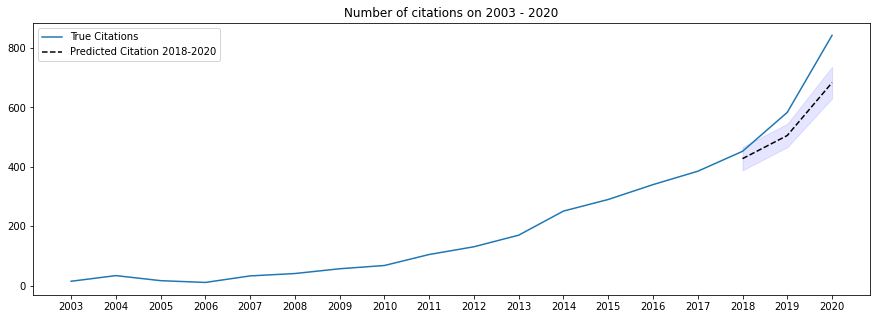

In [99]:
# You code: Visualize as required, the prediction with its confidence interval
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(15, 5))

ax.plot(range(2003, 2021), create_df.Citation.values[:-1], label="True Citations")

ax.plot(range(2018, 2021), predictions, 'k--', label="Predicted Citation 2018-2020")
ax.fill_between(
    range(2018, 2021),np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1], alpha=0.1, color='b')

ax.set_xticks(range(2003, 2021))
ax.set_title("Number of citations on 2003 - 2020")
plt.legend()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [100]:
# your code to run grid search
#p = list(range(1,3))
#q = list(range(1,3))
#d = list(range(1,3))
#RMSE = []
#PARAMETER = []
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

data ="/content/drive/My Drive/Citation2003-2021.csv"

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
X = X.astype('float32')

train, test = X[0:15], X[15:18]
history = [x for x in train]
predictions = list()
RMSE = []
PARAMETER = []
p=[1,2]
q=[1,2]
d=[1,2]

# walk-forward validation
for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
	      model = ARIMA(history, order=(i1,i3,i2))
	      model_fit = model.fit()
	      output = model_fit.forecast()
	      yhat = output[0]
	      predictions.append(yhat)
	      obs = test[t]
	      history.append(obs)
	      #print('predicted=%f, expected=%f' % (yhat, obs))  
      rmse = sqrt(mean_squared_error(test, predictions))
      history = [x for x in train]
      predictions = list()  
      RMSE.append(rmse)
      order = (i1,i2,i3)
      PARAMETER.append(order)
      print('Test RMSE: %.3f' % rmse,i1,i2,i3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 103.228 1 1 1
Test RMSE: 97.641 1 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 103.703 1 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 94.379 1 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 92.950 2 1 1
Test RMSE: 106.226 2 1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 102.636 2 2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 104.280 2 2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [101]:
# your code to generate the seach-results.csv and print the top 6 rows
#Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
#Results.head(6)
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
Results.to_csv('/content/drive/My Drive/Search-results.csv', index=False)
Results.head(6)

,RMSE,Parameter
0,103.228218,"(1, 1, 1)"
1,97.640804,"(1, 1, 2)"
2,103.702932,"(1, 2, 1)"
3,94.379288,"(1, 2, 2)"
4,92.949608,"(2, 1, 1)"
5,106.225676,"(2, 1, 2)"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [102]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]


# Your code to predict for 2021 and 2022
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = create_df.Citation.values[:-1]
history = [x for x in train]
prediction1 = list()
best_parameter = [2,1,1]

# Your code to predict for 2021 and 2022
model = ARIMA(history, order=(2,1,1))
model_fit = model.fit()
output = model_fit.get_forecast(2)
yhat = output.predicted_mean
confidence_interval2 = output.conf_int(0.05)

for i in range (len(yhat)):
     val = yhat[i]
     prediction1.append(yhat[i])
     print('predicted %.3f' % (val))
     ci= confidence_interval2[i]
     print('95%% Interval: %.3f to %.3f' % (ci[0], ci[1]))



predicted 1151.503
95% Interval: 1075.843 to 1227.163
predicted 1477.645
95% Interval: 1280.076 to 1675.213


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

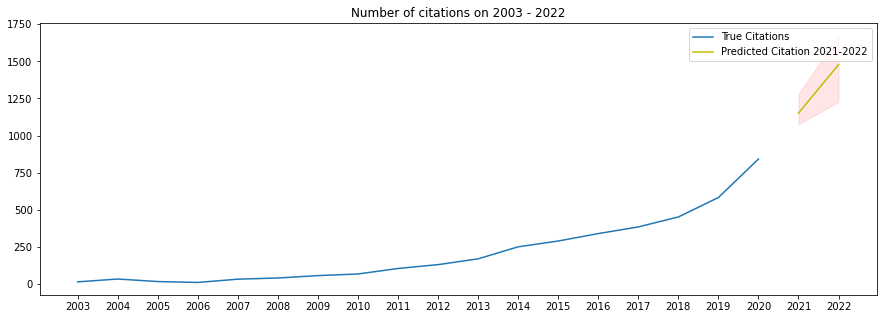

In [103]:
# Plot the points and the prediction with its confidence interval

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(15, 5))

ax.plot(range(2003, 2021), create_df.Citation.values[:-1], label="True Citations")

ax.plot(range(2021, 2023), prediction1, label="Predicted Citation 2021-2022", color='y')

ax.fill_between(
    range(2021, 2023),np.array(confidence_interval2)[0], np.array(confidence_interval2)[1], alpha=0.1, color='r')

ax.set_xticks(range(2003, 2023))
ax.set_title("Number of citations on 2003 - 2022")
plt.legend()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
